In [28]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\Akhila\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



   ------------------------------ --------- 42.7/56.8 MB 165.9 kB/s eta 0:01:25
   ------------------------------ --------- 42.7/56.8 MB 165.9 kB/s eta 0:01:25
   ------------------------------ --------- 42.7/56.8 MB 165.9 kB/s eta 0:01:25
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ --------- 43.0/56.8 MB 166.8 kB/s eta 0:01:23
   ------------------------------ -----

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [6]:
df = pd.read_csv(r"C:\Users\Akhila\tinnisense_dataset.csv")                              # Load the dataset

In [7]:
df

duration_hours  volume_percent  env_noise_dB  age  tone_test_avg  \
0               3.00              20         81.48   21          13.92   
1               7.61              63         35.60   36           4.78   
2               5.86              36         55.16   62           8.24   
3               4.79              26         90.09   39           8.70   
4               1.25              54         46.28   30          42.13   
...              ...             ...           ...  ...            ...   
3995            3.54              76         99.45   17          43.15   
3996            2.68              36         36.27   51          14.66   
3997            3.16              80         38.86   52          22.51   
3998            4.24              20         87.86   41          11.42   
3999            1.29              43         90.53   22          18.06   

      headphone_type  daily_sessions  occupational_noise_dB risk_level  
0                  1               2                  84.24     Medium  
1                  0               3                  89.81       High  
2                  0               5                  59.43       High  
3                  0               3                  76.75       High  
4                  1               4                  34.12     Medium  
...              ...             ...                    ...        ...  
3995               0               5                  52.55       High  
3996               0               4                  89.10       High  
3997               0               4                  67.44       High  
3998               1               5                  96.05       High  
3999               0               3                  35.52     Medium  

[4000 rows x 9 columns]

In [8]:
print(df.head())                                        #first 5 rows


   duration_hours  volume_percent  env_noise_dB  age  tone_test_avg  \
0            3.00              20         81.48   21          13.92   
1            7.61              63         35.60   36           4.78   
2            5.86              36         55.16   62           8.24   
3            4.79              26         90.09   39           8.70   
4            1.25              54         46.28   30          42.13   

   headphone_type  daily_sessions  occupational_noise_dB risk_level  
0               1               2                  84.24     Medium  
1               0               3                  89.81       High  
2               0               5                  59.43       High  
3               0               3                  76.75       High  
4               1               4                  34.12     Medium  


In [46]:
df.columns

Index(['duration_hours', 'volume_percent', 'env_noise_dB', 'age',
       'tone_test_avg', 'headphone_type', 'daily_sessions',
       'occupational_noise_dB', 'risk_level'],
      dtype='object')

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_hours         4000 non-null   float64
 1   volume_percent         4000 non-null   int64  
 2   env_noise_dB           4000 non-null   float64
 3   age                    4000 non-null   int64  
 4   tone_test_avg          4000 non-null   float64
 5   headphone_type         4000 non-null   int64  
 6   daily_sessions         4000 non-null   int64  
 7   occupational_noise_dB  4000 non-null   float64
 8   risk_level             4000 non-null   object 
dtypes: float64(4), int64(4), object(1)
memory usage: 281.4+ KB
None


In [10]:
print(df.describe())

       duration_hours  volume_percent  env_noise_dB          age  \
count     4000.000000     4000.000000   4000.000000  4000.000000   
mean         3.980140       50.226500     65.263380    39.609500   
std          2.322911       29.140762     20.131114    17.627058   
min          0.000000        0.000000     30.010000    10.000000   
25%          1.950000       25.000000     48.450000    24.000000   
50%          4.000000       50.000000     65.530000    39.000000   
75%          6.000000       76.000000     82.720000    55.000000   
max          8.000000      100.000000     99.980000    70.000000   

       tone_test_avg  headphone_type  daily_sessions  occupational_noise_dB  
count    4000.000000     4000.000000     4000.000000            4000.000000  
mean       24.971573        0.506250        3.065750              65.525112  
std        14.310704        0.500023        1.418425              20.002130  
min         0.010000        0.000000        1.000000              30.000000

In [11]:
# Check distribution of risk levels
print(df['risk_level'].value_counts())

risk_level
High      2660
Low        868
Medium     472
Name: count, dtype: int64


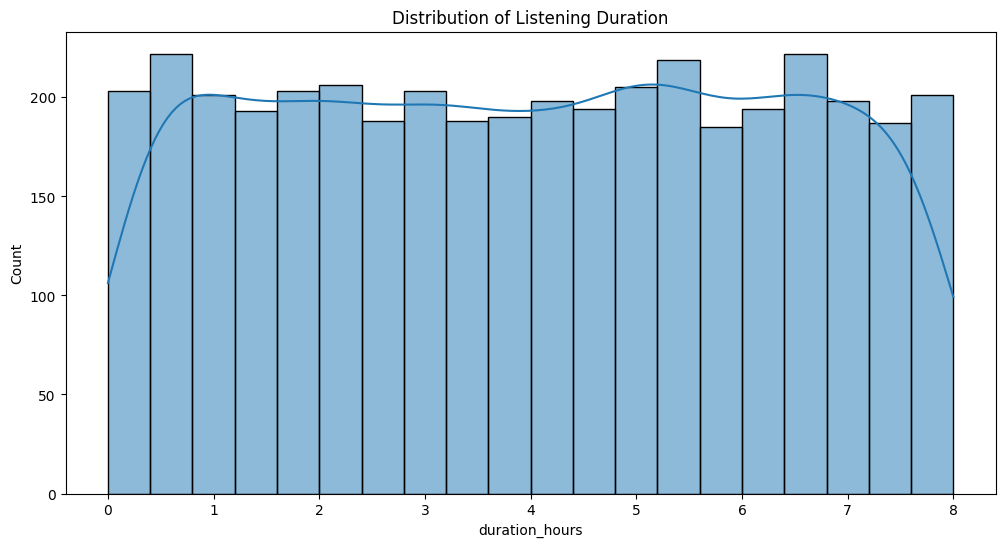

In [12]:
#Plot distributions
plt.figure(figsize=(12,6))
sns.histplot(df['duration_hours'], bins=20, kde=True)
plt.title("Distribution of Listening Duration")
plt.show()

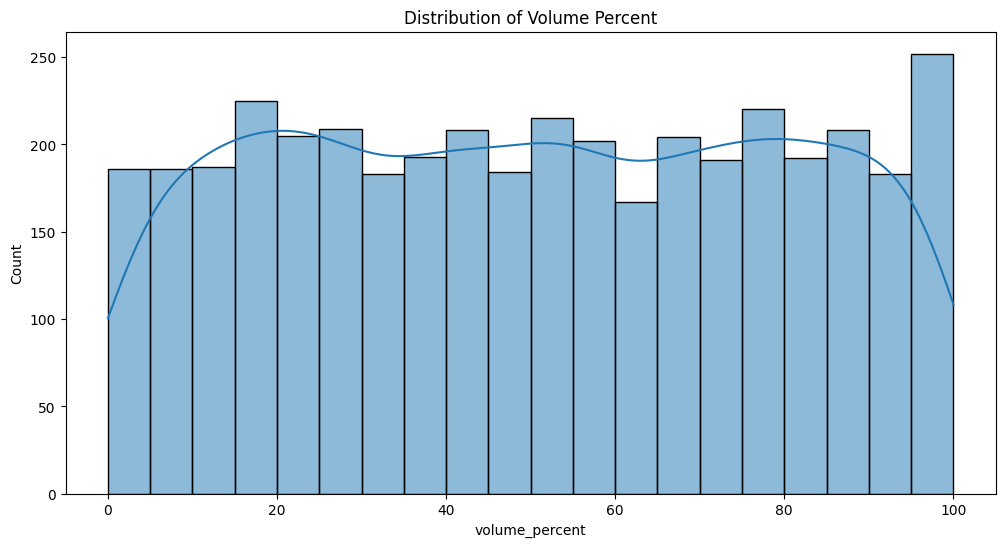

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['volume_percent'], bins=20, kde=True)
plt.title("Distribution of Volume Percent")
plt.show()


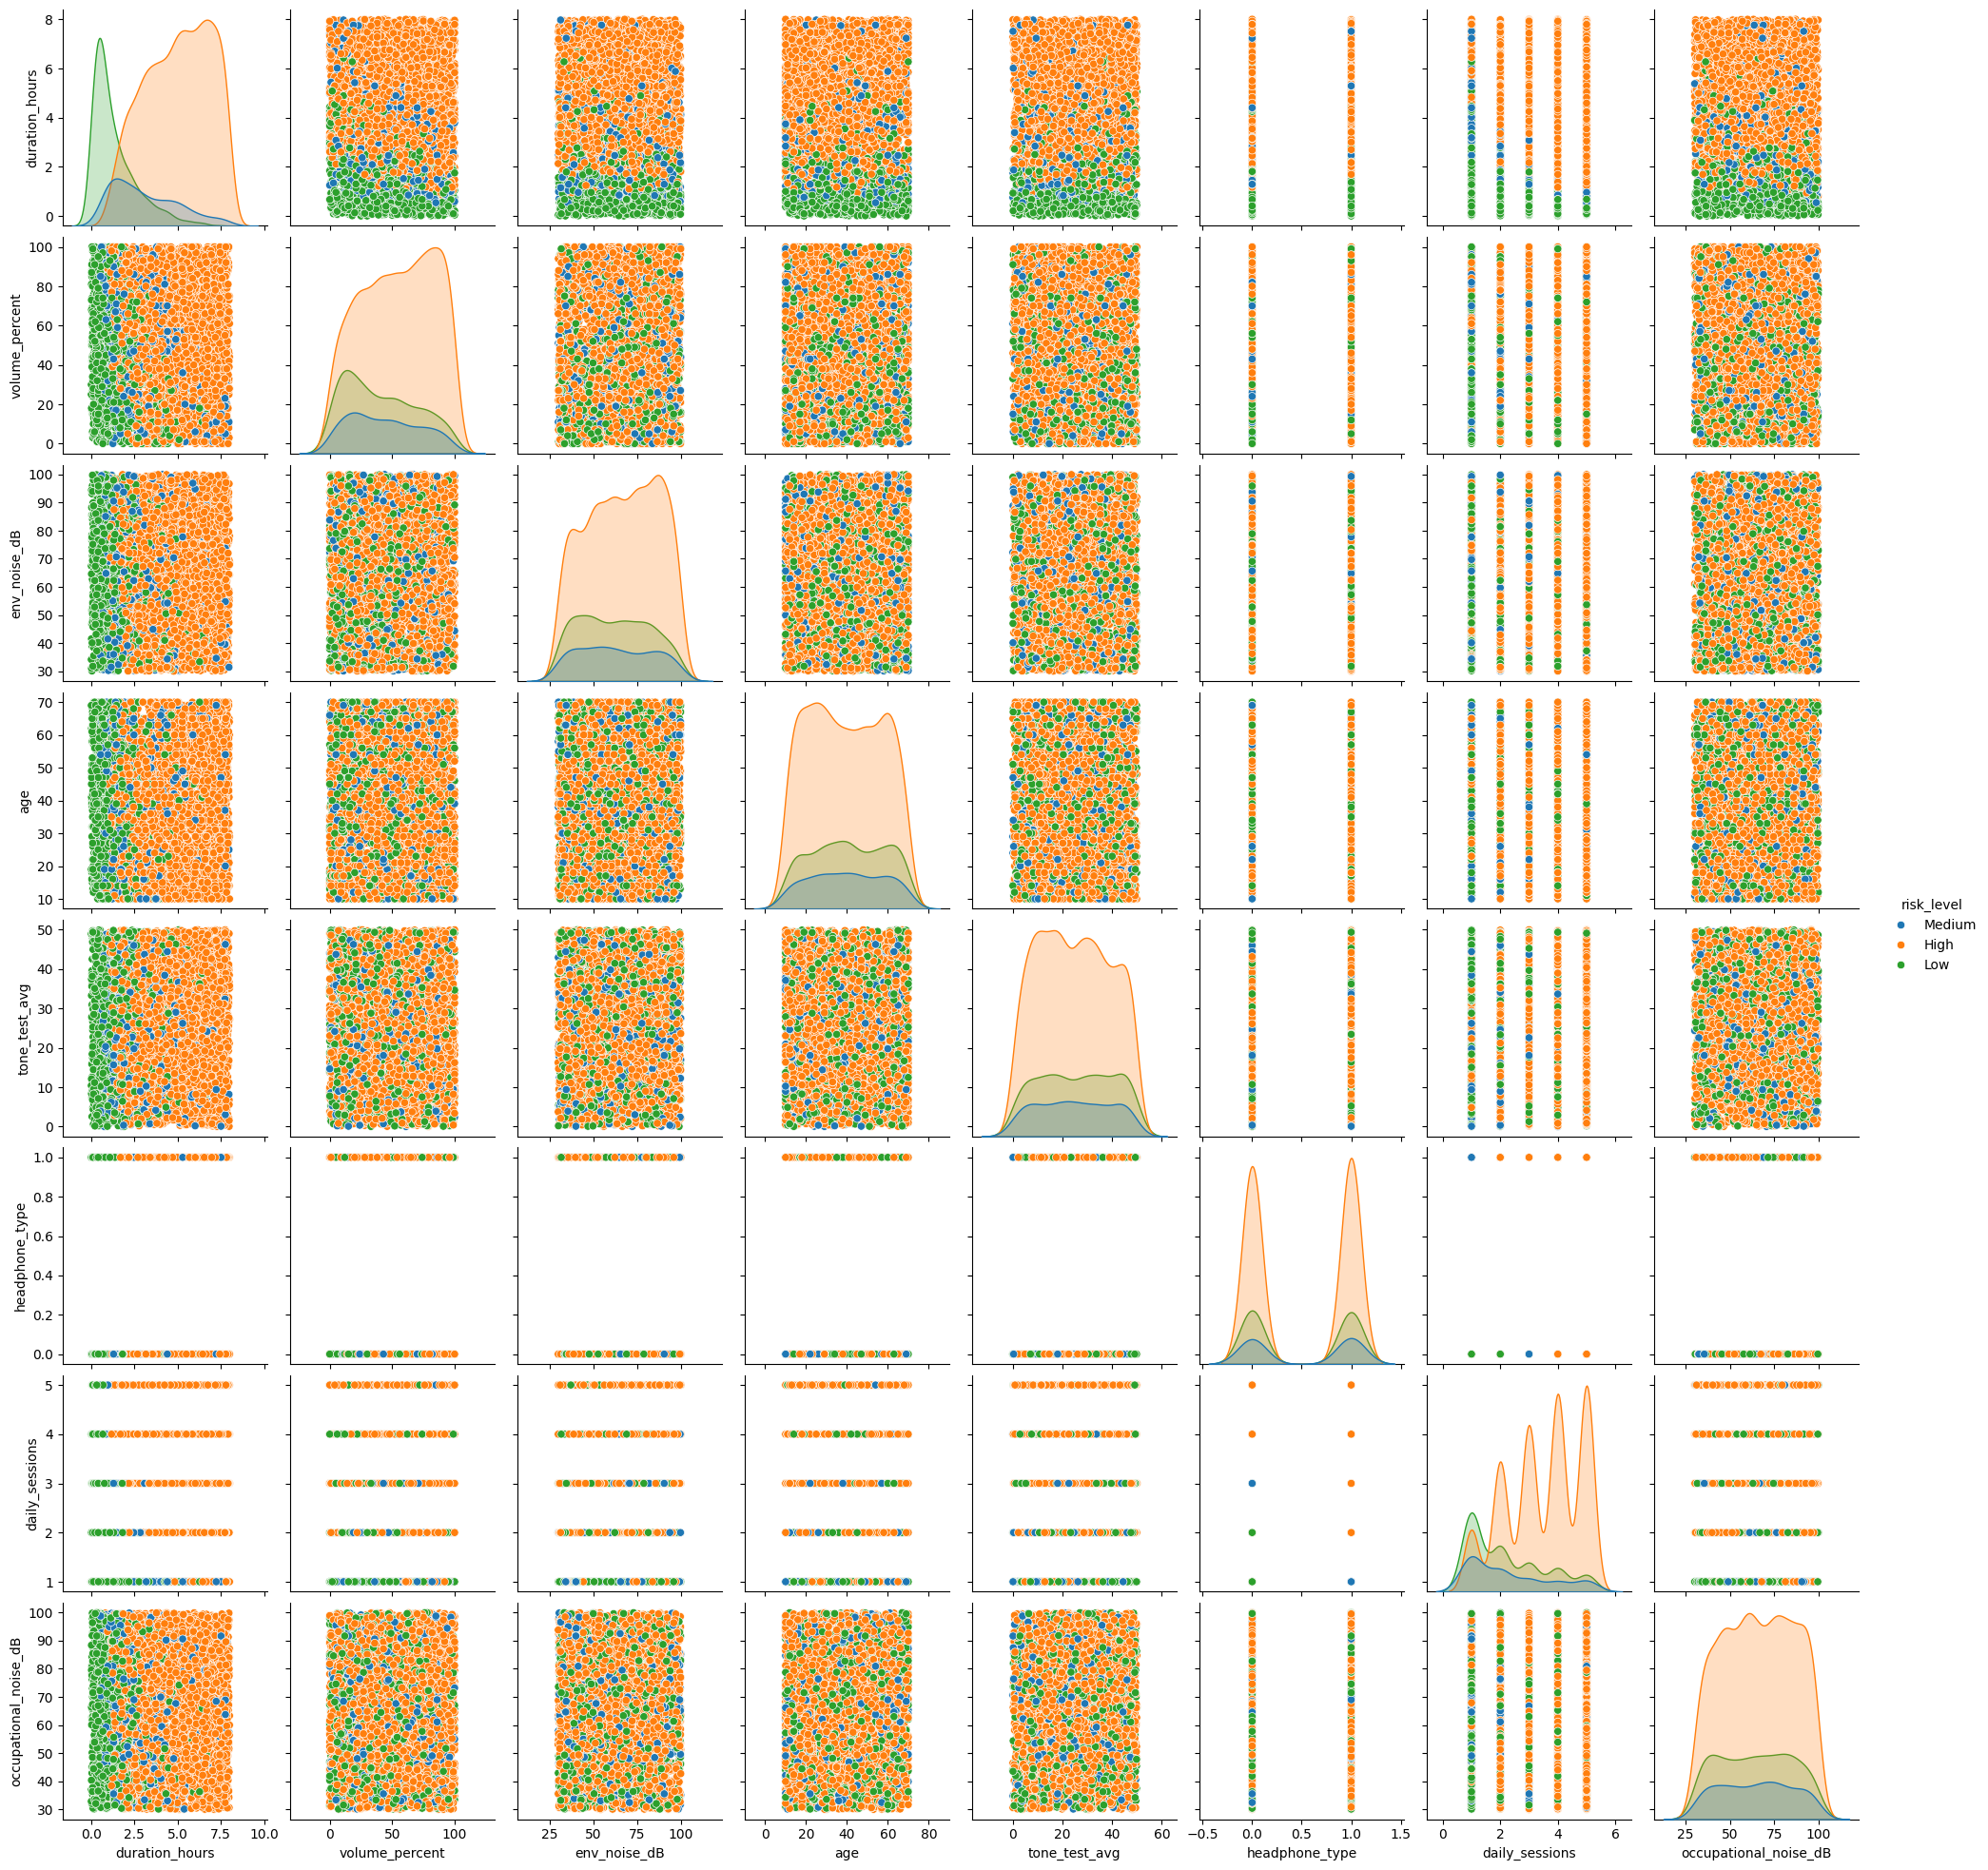

In [14]:
# Pairplot to see relationships
sns.pairplot(df, hue='risk_level')
plt.show()


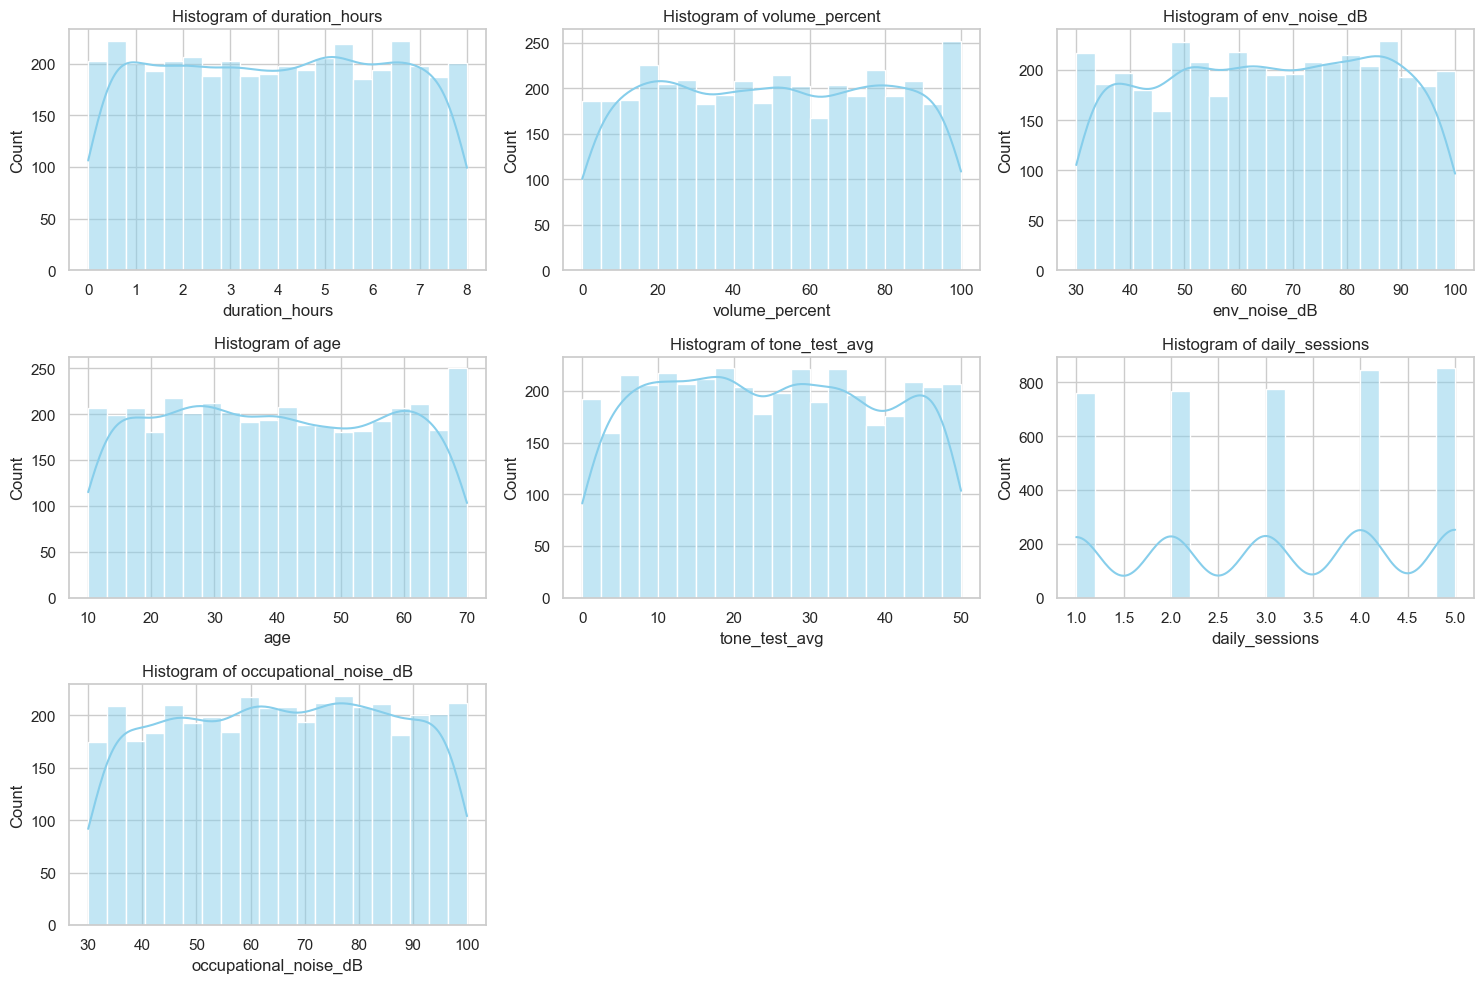

In [15]:
# Set style for plots
sns.set(style="whitegrid")

# List of numeric features to visualize
features = [
    "duration_hours", 
    "volume_percent", 
    "env_noise_dB", 
    "age", 
    "tone_test_avg", 
    "daily_sessions", 
    "occupational_noise_dB"
]

# ---- Histograms ----
plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], bins=20, kde=True, color="skyblue")
    plt.title(f"Histogram of {feature}")
plt.tight_layout()
plt.show()



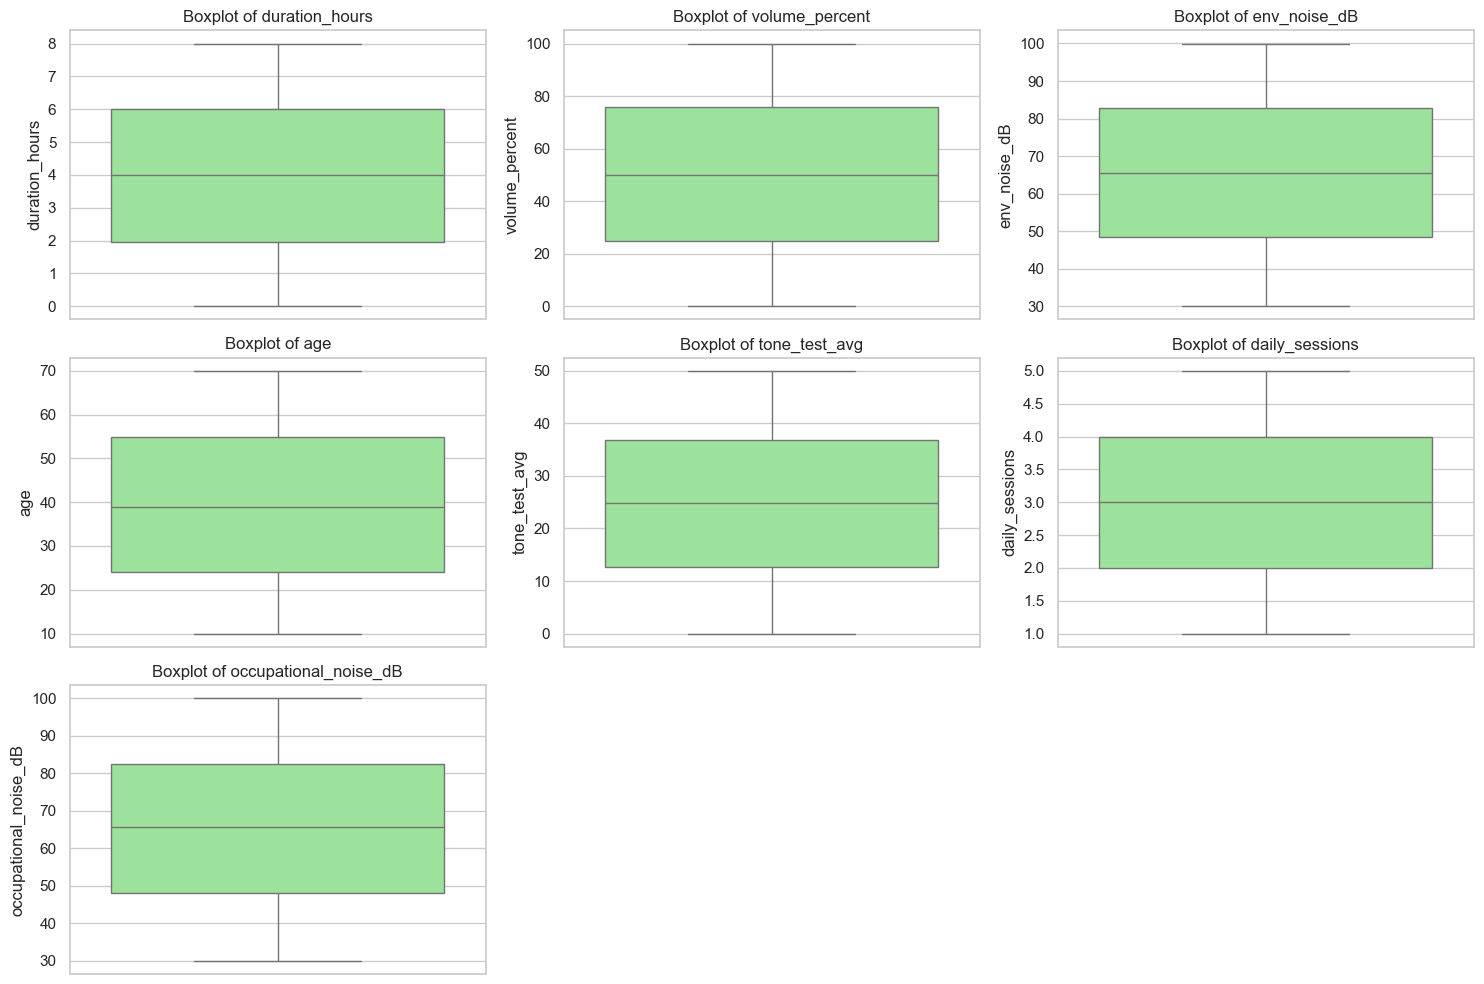

In [16]:
# ---- Boxplots ----
plt.figure(figsize=(15,10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature], color="lightgreen")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()



C:\Users\Akhila\AppData\Local\Temp\ipykernel_25376\2949039088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="risk_level", data=df, palette="Set2")


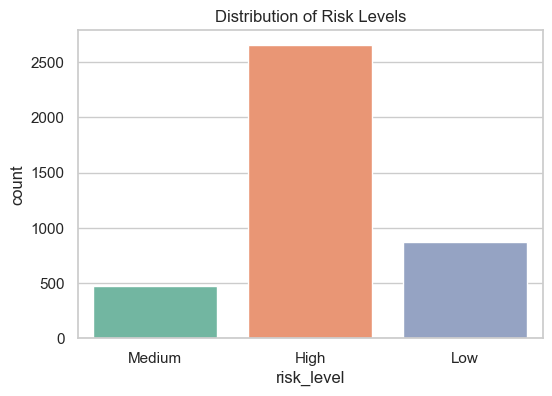

In [17]:
# ---- Optional: Risk Level Count ----
plt.figure(figsize=(6,4))
sns.countplot(x="risk_level", data=df, palette="Set2")
plt.title("Distribution of Risk Levels")
plt.show()

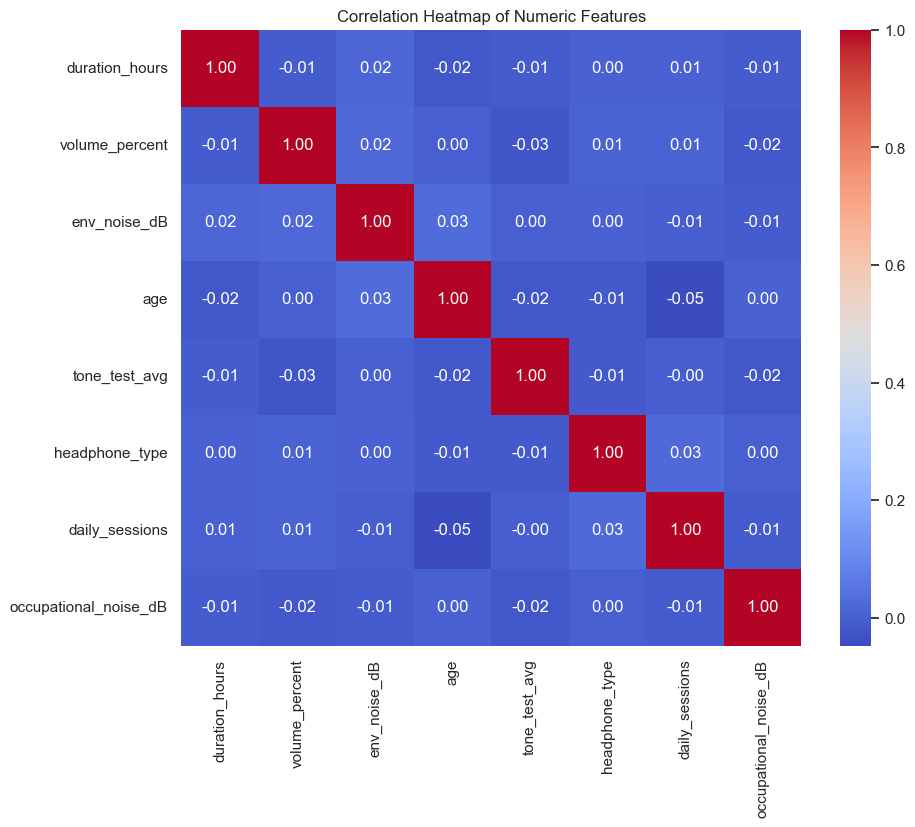

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [19]:
# Count of each risk level
print("Class balance for risk_level:")
print(df['risk_level'].value_counts())



Class balance for risk_level:
risk_level
High      2660
Low        868
Medium     472
Name: count, dtype: int64


In [20]:
# ---- Step 1: Separate features and target ----
X = df.drop("risk_level", axis=1)  # All columns except target
y = df["risk_level"]               # Target column



In [21]:
 #---- Step 2: Encode target labels ----
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low->0, Medium->1, High->2


In [22]:
# ---- Step 3: Scale features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# ---- Optional: Check results ----
print("First 5 rows of scaled features:")
print(X_scaled[:5])
print("\nEncoded target values:")
print(y_encoded[:5])
print("\nClasses mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

First 5 rows of scaled features:
[[-0.42199737 -1.03738809  0.80565078 -1.05586685 -0.77235574  0.98757716
  -0.7514554   0.93576171]
 [ 1.56282916  0.43839269 -1.47369336 -0.20479601 -1.41111837 -1.01257911
  -0.04636002  1.21426687]
 [ 0.80937006 -0.48826035 -0.50194159  1.27039344 -1.16931107 -1.01257911
   1.36383074 -0.30476127]
 [ 0.34868365 -0.83146519  1.23340041 -0.03458185 -1.13716328 -1.01257911
  -0.04636002  0.56125477]
 [-1.17545646  0.12950834 -0.94310497 -0.54522435  1.19914248  0.98757716
   0.65873536 -1.57028471]]

Encoded target values:
[2 0 0 0 2]

Classes mapping: {'High': 0, 'Low': 1, 'Medium': 2}


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Class distribution in train:", pd.Series(y_train).value_counts(normalize=True))
print("Class distribution in test:", pd.Series(y_test).value_counts(normalize=True))


Training set shape: (3200, 8) (3200,)
Testing set shape: (800, 8) (800,)
Class distribution in train: 0    0.665000
1    0.216875
2    0.118125
Name: proportion, dtype: float64
Class distribution in test: 0    0.6650
1    0.2175
2    0.1175
Name: proportion, dtype: float64


In [30]:
#model training (Random Forest)

Model Accuracy: 0.93125

Classification Report:
               precision    recall  f1-score   support

         Low       0.95      0.99      0.97       532
      Medium       0.91      0.95      0.93       174
        High       0.81      0.54      0.65        94

    accuracy                           0.93       800
   macro avg       0.89      0.83      0.85       800
weighted avg       0.93      0.93      0.93       800



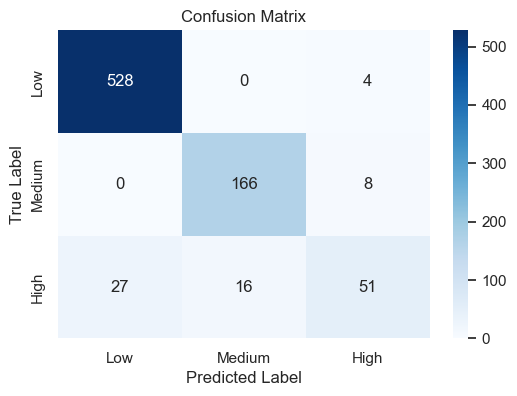

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Step 5: Train ML Model
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train on training data
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# ✅ Evaluate performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.9300
Classification Report for Random Forest:
               precision    recall  f1-score   support

        High       0.95      0.99      0.97       532
         Low       0.91      0.95      0.93       174
      Medium       0.81      0.53      0.64        94

    accuracy                           0.93       800
   macro avg       0.89      0.83      0.85       800
weighted avg       0.92      0.93      0.92       800



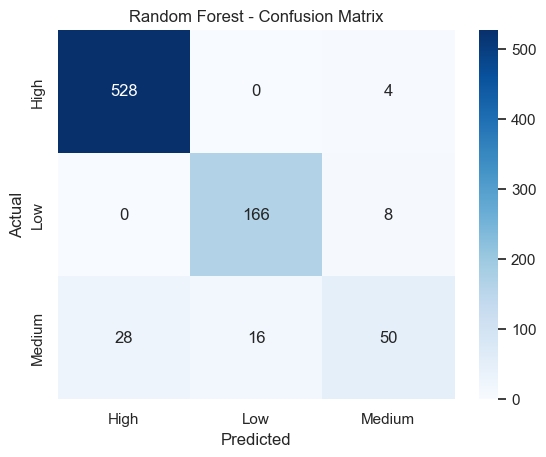


🔹 Training Gradient Boosting...
✅ Gradient Boosting Accuracy: 0.9513
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

        High       0.97      0.99      0.98       532
         Low       0.94      0.95      0.95       174
      Medium       0.83      0.73      0.78        94

    accuracy                           0.95       800
   macro avg       0.92      0.89      0.90       800
weighted avg       0.95      0.95      0.95       800



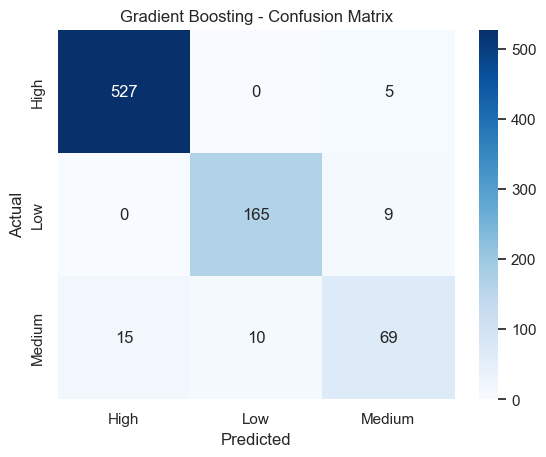


🔹 Training XGBoost...


C:\Users\Akhila\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.9475
Classification Report for XGBoost:
               precision    recall  f1-score   support

        High       0.97      0.99      0.98       532
         Low       0.93      0.96      0.94       174
      Medium       0.82      0.70      0.76        94

    accuracy                           0.95       800
   macro avg       0.91      0.88      0.89       800
weighted avg       0.95      0.95      0.95       800



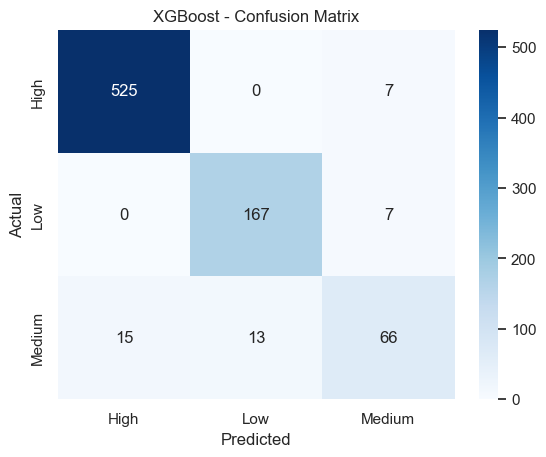


🏆 Best Model: Gradient Boosting with Accuracy = 0.95125


In [47]:
le_headphone = LabelEncoder()
df['headphone_type'] = le_headphone.fit_transform(df['headphone_type'])

# Encode target column: risk_level
le_risk = LabelEncoder()
df['risk_level'] = le_risk.fit_transform(df['risk_level'])  
# Classes will be mapped like {0: Low, 1: Medium, 2: High} (check with le_risk.classes_)

# Features & Target
X = df.drop(columns=['risk_level'])
y = df['risk_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)  # Train
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n", 
          classification_report(y_test, y_pred, target_names=le_risk.classes_))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=le_risk.classes_, yticklabels=le_risk.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    results[name] = acc

# Best model
best_model = max(results, key=results.get)
print("\n🏆 Best Model:", best_model, "with Accuracy =", results[best_model])


In [48]:
import pickle
import os

# Path to save
save_path = r"C:\Users\Akhila\tinnitus_detection\models"
os.makedirs(save_path, exist_ok=True)

# Save best Gradient Boosting model
with open(os.path.join(save_path, "final_gb_model.pkl"), "wb") as f:
    pickle.dump(best_model, f)

# Save scaler
with open(os.path.join(save_path, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder
with open(os.path.join(save_path, "label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)

print("✅ Final Gradient Boosting model & preprocessing objects saved!")


✅ Final Gradient Boosting model & preprocessing objects saved!


In [49]:
import pickle

# After training your model
with open(r"C:\Users\Akhila\tinnitus_detection\models\final_gb_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open(r"C:\Users\Akhila\tinnitus_detection\models\scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder
with open(r"C:\Users\Akhila\tinnitus_detection\models\label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


In [56]:
import pickle
import numpy as np

# ✅ Load model, scaler, and encoder
with open(r"C:\Users\Akhila\tinnitus_detection\models\final_gb_model.pkl", "rb") as f:
    model = pickle.load(f)

with open(r"C:\Users\Akhila\tinnitus_detection\models\scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open(r"C:\Users\Akhila\tinnitus_detection\models\label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# ✅ User input
duration_hours = float(input("Enter listening duration (hours/day): "))
volume_percent = float(input("Enter average volume level (%): "))
env_noise_dB = float(input("Enter environmental noise level (dB): "))
age = int(input("Enter age: "))
tone_test_avg = float(input("Enter tone test average (Hz): "))
headphone_type = input("Enter headphone type (High/Low/Medium): ")
daily_sessions = int(input("Enter number of daily listening sessions: "))
occupational_noise_dB = float(input("Enter occupational noise exposure (dB): "))

# ✅ Fix input case (standardize to match training labels)
headphone_type = headphone_type.strip().title()   # e.g., "in-ear" → "In-Ear"

# ✅ Check if valid headphone type
if headphone_type not in label_encoder.classes_:
    raise ValueError(f"Invalid headphone type '{headphone_type}'. Please choose from {list(label_encoder.classes_)}")

# ✅ Encode categorical variable
headphone_type_encoded = label_encoder.transform([headphone_type])[0]

# ✅ Prepare input features
features = np.array([[duration_hours, volume_percent, env_noise_dB, age,
                      tone_test_avg, headphone_type_encoded, daily_sessions,
                      occupational_noise_dB]])

# ✅ Scale features
features_scaled = scaler.transform(features)

# ✅ Predict risk level
prediction = model.predict(features_scaled)[0]

# ✅ Map prediction back to label
predicted_label = label_encoder.inverse_transform([prediction])[0]

print("\n🎯 Predicted Risk Level:", predicted_label)

# ✅ Provide suggestions
if predicted_label.lower() == "high":
    print("⚠️ Suggestion: Reduce listening time/volume immediately. Use over-ear headphones and take frequent breaks.")
elif predicted_label.lower() == "medium":
    print("⚠️ Suggestion: Be cautious! Lower your daily sessions and keep volume under 60%.")
else:
    print("✅ Suggestion: Your hearing is safe. Maintain healthy listening habits.")


Enter listening duration (hours/day):  4
Enter average volume level (%):  76
Enter environmental noise level (dB):  45
Enter age:  18
Enter tone test average (Hz):  43
Enter headphone type (High/Low/Medium):  High
Enter number of daily listening sessions:  5
Enter occupational noise exposure (dB):  45



🎯 Predicted Risk Level: Low
✅ Suggestion: Your hearing is safe. Maintain healthy listening habits.


C:\Users\Akhila\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
